## **Simulating Data for Python Didactics**
### VA Opioid and Benzodiazepene Dual-Prescription Among Veterans Dual-Enrolled in the VA Healthcare System and Medicare/Medicaid
#### **Author(s)**: Dominic DiSanto
#### **Written**: 6/29/2020
#### **Updated**: 09/07/2020
#### **Version**: 0.10

Inspiration from Dr. Paris's and Gellad's [publicily available cyberseminar](https://www.hsrd.research.va.gov/for_researchers/cyber_seminars/archives/video_archive.cfm?SessionID=3543) covering VA Pharmacy Data  
NOTE: This was uploaded 9/8/2020 to preserve this code. The data simulation is being somewhat adapted to be slightly adapted to remove some unnecessary "duration of medication administration" data. 
*(Most notably results contained in slides 34-42)*

#### **Introduction**  
The present notebook simulates a data set to be possibly used in a use case for the University of Pittsburgh's School of Pharmacy course *Python for Data Management and Analyatics* from Dr. Ravi Patel and Dr. Dmitriy Babichenko. This specific script was created under a grnat from Dr. Patel intended to supplement the course's current format with additional student resources, assignments, etc.  The notebook includes simulating two data sets including a subset of common patients with data available t be cleaned, merged, and visualized/analyzed. 
  
This use case is referenced as a "faux" use case, as I (Dominic) developed this code after watching the VA's CyberSeminar series for work. This notebook also allowed me to a) practice Python and my notebook organization and b) have a first-pass/practice notebook of simulating data, allowing myself a test-run to identify best ways to organize my code, troubleshoot common errors, and identify my own "best-practices" before working to simulate data for one of our more important/developed use cases.   
  
I also want to explicitly acknowledge changes to the true research that I've implemented to simplify some of the data simulation and the anticipated student work:
1. While the lecture and slides linked in the preamble identify patients based on a metric akin to "percentage of visits to VA hospitals vs using CMS benefits", I will simply dichotomize patients to "dual enrollment" (for those with a visit in both CMS and VA data sets) and "VA only". These groups can then be more simply identified, plotted, compared, etc.
2. Some overlapping patients (i.e. VA & CMS dual enrollment) will have overlapping prescriptions as well. The total dose will have to be summed between the two data sources to identify the true 120 morphine mg equivalents taken by the patient (with all data assuming full medication adherence). 
3. I have reduced the number of medications and there presented dosages and free-text entries into the theoretical medical record or research database. This can always be upscaled to include more diverse/complicated medications, presentations, text, etc. 
> An aside, there is inherently a "CMS only" group, but I've left them out as out-of-focus compared to the VA enrolled patients. It could be left as an additional post-hoc to the user to plot this third group, after comparing the "VA-only" and "dual enrollment" groups 

#### **General Goals/Uses of Generated Data**
1. Artificial data errors/cleaning tasks to demonstrate a Pharm/Meds related data set to work with character data, text matching/basic NLP, and data merging (of "VA" and "CMS" data) 


2. Data management of identifying the outcome/risk factor of interest
    1. dual prescription of opioids & benzodiazepenes for over 30 days (minimum of two drugs)
    2. dual prescription of high-dose (defined as 120 morphine mg equivalents) opioids & benzodiazepines for over 30 days   
    [The following infographic is useful in determining MME equivalents](https://www.cdc.gov/drugoverdose/pdf/calculating_total_daily_dose-a.pdf)
    
    
3. Data visualiation, trying to recreate a (loosely) similar plot to slide 42 in the VA slideshow of dual-prescription with definitions taken from [Carico et al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6219924/)    *(or presentation slide 32, in the Abstract's Measurements section)*. 


4. Lastly (and optionally, beyond the scope of Dr. Gellad's presentation) some sort of statistical inference related to this data. 
    1. ***Dominic N.B.*** - For now, I will omit this section. My general thought process (currently) is that since this is likely a use case of less interest than those that were specifically developed/tailored from interviews with course "alum" or more relevant examples, this should be a lower priority. 

#### **Assessment/Student Use**
*Need to better outline theoretical assessments for students based on the goals above* 

### Set Up 

In [1]:
import scipy as sci
import numpy as np
import pandas as pd
np.random.seed(1892)

#### General Process
   1. Compile simulated VA patient visit data set  
   2. Sample some proportion of VA patients into CMS data set  
   3. Reconfigure sample data to meet CMS data formatting  
   4. Generate non-VA patients in CMS data set  
   5. Develop prompt/problem
   6. Work through example "solution" (although there are obviously infinite ways to present/comapre data)   

## **1) Simulate VA Patient Data Set**
### Generate Variables
#### **ID's (Fake, Scrambled SSN's)**

In [2]:
#####
# Need to fix this chunk, instead of generating the ids_num and then convering to strings, 
# I should randomly sample from the existing ID list, so that there is not any perfect overlap
# of the "VA enrolled" and "CMS enrolled" patients

# Changing my workflow to generate the VA data first, then to sample and generate additional CMS data
#####
ids_num = np.random.randint(111111111, 999999999, 808)


# Generating ID's
    # Modeled as fake, scrambled SSN's 
    # For complexity, including these as hyphenated strings in the VA data 
    # and integers in the medicare/medicaid data

# ids_num=[]
# ids_char=[]

# for i in range(1,809):
  #   x = np.random.randint(111111111, 999999999)
  #   ids_num += [x]
  #   ssn_r = str(x)[0:3] + '-' + str(x)[3:5] + "-" + str(x)[5:10]
  #   ids_char += [ssn_r]

    
display(ids_num[0:4]) # Just a quick test
display(len(ids_num))
# display(ids_char[0:4]) # Just a quick test

array([609548877, 224736371, 601083249, 233862042])

808

#### **Age**

In [3]:
import matplotlib.pyplot as pyplot
age_va = [40 + np.random.beta(2.5, 0.8, size=505)*40]

for i in range(506, 809):
    age_va = np.append(age_va, 45 - np.random.beta(0.4, 0.37)*10)

age_va = np.round(age_va, 0)

display(len(age_va))
display(pyplot.hist(age_va))

808

(array([168.,  58.,  89.,  14.,  28.,  44.,  55.,  69., 107., 176.]),
 array([35. , 39.5, 44. , 48.5, 53. , 57.5, 62. , 66.5, 71. , 75.5, 80. ]),
 <a list of 10 Patch objects>)

#### **Height (cm)**
For simplicity, we will simply sample a normal distribution using my quick Google of an average male height of 175 cm and a roughly narrow distribution with sd +/- 9 cm.

147.58

207.17

(array([  7.,  30.,  81., 158., 197., 190., 105.,  32.,   5.,   3.]),
 array([147.58 , 153.539, 159.498, 165.457, 171.416, 177.375, 183.334,
        189.293, 195.252, 201.211, 207.17 ]),
 <a list of 10 Patch objects>)

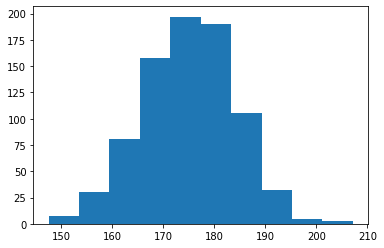

In [4]:
height_va = np.round(np.random.normal(loc=175, scale=9, size=808), 2)

display(height_va.min())
display(height_va.max())
display(pyplot.hist(height_va))

#### **Weight (kg)**
We will correlate weight to height with some small noise included. We will assume BMI should be roughly normally distributed of mean 31 and standard deviation of 2.8 [[loose reference for numbers I somewhat pulled from a hat]](https://dqydj.com/bmi-distribution-by-age-calculator-for-the-united-states/). As a result, we will randomly assign individuals a BMI, then back-calculate weight (and only keep the weight variable).

In [5]:
weight_va = np.round(np.random.normal(31, 2.8, 808) * np.square((height_va/100)), 2)
weight_va[1:100]

display(weight_va.min()*2.2046)
display(weight_va.max()*2.2046)

124.25125600000001

318.388332

#### **Medication**

In [6]:
medication_va = ['foobar']*808

#### **Medication Dose**

In [7]:
med_dose_va = [8] * 808

#### **Medication Dose Unit**

In [8]:
dose_unit_va = ['mL/kg'] * 808

#### **Visit Date**

In [9]:
# Shamelessly taken and only marginally adapted from the second answer at
# https://stackoverflow.com/questions/553303/generate-a-random-date-between-two-other-date

#from datetime import timedelta
from datetime import datetime
from datetime import timedelta
from random import randrange

start = datetime.strptime('1/1/2018', '%m/%d/%Y')
end = datetime.strptime('1/1/2020', '%m/%d/%Y')
visit_date_va=[]

for i in range(1,809):
    delta = end - start
    int_delta = (delta.days)
    rand_days = randrange(int_delta)
    x = start + timedelta(days=rand_days)
    visit_date_va.append(str(x)[0:10])

visit_date_va[0:10]

['2018-10-28',
 '2019-10-18',
 '2019-06-08',
 '2018-08-09',
 '2019-03-15',
 '2019-01-20',
 '2019-10-20',
 '2019-03-09',
 '2019-12-02',
 '2019-03-05']

#### Duration Value

In [10]:
# Will simply be a mix of days (14-35), months (1-2), and weeks (3-8) 
# I have no idea how long a typical script would be for these things so this could change
med_dur_va = np.random.choice( \
    np.concatenate([np.random.randint(1, 8, size=500), \
                    # randomly generating month, week values
                    np.random.randint(14, 35, size=308)]), \
                               # randomly generating day values
    size=808, replace=False) # np.choice resamples w/o replacement, effectively  rearranging the array


#### Duration Unit

In [11]:
# Duration unit will depend upon the value, not a lot of variability here
# values of 30+ will be days
# values of 1, 2 can be months or weeks 
# values of 4-8 will be weeks

med_data_va = pd.DataFrame(data=med_dur_va, columns=['Medication Duration'])
med_data_va['Duration Unit'] = ''

for i in range(0, med_data_va.shape[0]):
    med_data_va['Duration Unit'].iloc[i] = str(np.where( \
        med_data_va['Medication Duration'].iloc[i]<=4, str(np.random.choice(['Month', 'Week'], \
            p=[0.4, 0.6])), \
    np.where(med_data_va['Medication Duration'].iloc[i]<10, 'Week', 'Day')))

med_data_va.sort_values('Medication Duration')

C:\Users\Dominic DiSanto\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Medication Duration,Duration Unit
447,1,Week
523,1,Week
194,1,Week
105,1,Week
195,1,Week
...,...,...
595,34,Day
212,34,Day
64,34,Day
294,34,Day


### Creating VA Data Frame

In [12]:
VA_data = pd.DataFrame({
    'Patient ID': ids_num, 
    'Visit Date': visit_date_va,
    'Age': age_va,
    'Height': height_va,
    'Weight': weight_va,
    'Medication': medication_va,
    'Medication Dose': med_dose_va,
    'Medication Dose Unit': dose_unit_va,
    'Medication Duration Value': med_data_va['Medication Duration'],
    'Medication Duration Unit': med_data_va['Duration Unit']            
})

In [13]:
VA_data.sample(5)

,Patient ID,Visit Date,Age,Height,Weight,Medication,Medication Dose,Medication Dose Unit,Medication Duration Value,Medication Duration Unit
373,660173633,2018-07-30,55.0,172.11,101.72,foobar,8,mL/kg,3,Week
219,939170746,2019-03-16,79.0,175.77,90.80,foobar,8,mL/kg,28,Day
572,127377741,2018-03-26,38.0,181.60,97.91,foobar,8,mL/kg,4,Week
251,113152127,2018-08-15,70.0,179.01,114.83,foobar,8,mL/kg,32,Day
643,749051669,2019-02-11,45.0,162.26,80.88,foobar,8,mL/kg,3,Week


## **2. Sample some proportion of VA patients into CMS data set**
I will start by sampling a subset of rows from the VA data as our "dual-enrolled" patients (I chose 384 on a whim and as a roughly near-50/50 split, seems like a nice number idk). I'll then add new CMS style variables to this data frame, and finally retain only the CMS variables.

> Appending the new variables to the data frame will allow me to check-as-I-go to ensure I create the variables I'm intending to create. Then in a final step, I will simply keep only the CMS variables identified by a "*(CMS)*" suffix. 

In [14]:
CMS_VA_dual_pats = VA_data.sample(384).reset_index(drop=False) # keeping 
CMS_VA_dual_pats.head(4)

,index,Patient ID,Visit Date,Age,Height,Weight,Medication,Medication Dose,Medication Dose Unit,Medication Duration Value,Medication Duration Unit
0,73,297209817,2019-09-05,74.0,191.33,114.89,foobar,8,mL/kg,6,Week
1,707,188483541,2018-01-28,44.0,176.16,92.24,foobar,8,mL/kg,7,Week
2,728,653054327,2019-01-18,44.0,160.71,85.48,foobar,8,mL/kg,5,Week
3,162,547915161,2019-04-15,68.0,173.48,94.27,foobar,8,mL/kg,22,Day


## **3. Reconfigure sample data to meet CMS data formatting**
Age will remain the same. Changes made to all other variables will be identified in each variable's respective section.

#### Patient ID 
Currently an integer, I will add in the hyphen's ("-") to represent the SSN structure of the ID variable, and to require students to work with substring or string replace and casting data types. 

In [15]:
CMS_VA_dual_pats['Patient ID (CMS)'] = ''
for i in range(0,CMS_VA_dual_pats.shape[0]):
    x = str(CMS_VA_dual_pats.loc[i, 'Patient ID'])
    ssn_r = x[0:3] + '-' + x[3:5] + "-" + x[5:10]
    CMS_VA_dual_pats.loc[i, 'Patient ID (CMS)'] = [ssn_r]
    
CMS_VA_dual_pats[['Patient ID', 'Patient ID (CMS)']].sample(6)

,Patient ID,Patient ID (CMS)
70,135223302,135-22-3302
330,363166616,363-16-6616
35,258262231,258-26-2231
170,441551515,441-55-1515
169,952770365,952-77-0365
358,245904972,245-90-4972


#### Height
Convering cm to inches (~0.3937 inches per cm)

In [16]:
CMS_VA_dual_pats['Height (CMS)'] = round(CMS_VA_dual_pats['Height'] * 0.3937, 2)
CMS_VA_dual_pats[['Height','Height (CMS)']].sample(6)

,Height,Height (CMS)
360,170.78,67.24
320,158.68,62.47
242,164.85,64.90
119,167.65,66.00
292,177.80,70.00
65,184.53,72.65


#### Weight
Converting kg to lbs (~2.24 lbs per kg) 

In [17]:
CMS_VA_dual_pats['Weight (CMS)'] = round(CMS_VA_dual_pats['Weight'] * 2.24, 2)
CMS_VA_dual_pats[['Weight','Weight (CMS)']].sample(6)

,Weight,Weight (CMS)
179,73.90,165.54
380,102.08,228.66
258,103.04,230.81
322,90.56,202.85
220,91.86,205.77
344,65.87,147.55


#### Medication 

In [18]:
CMS_VA_dual_pats['Medication (CMS)'] = CMS_VA_dual_pats['Medication']
CMS_VA_dual_pats[['Medication','Medication (CMS)']].sample(5)

,Medication,Medication (CMS)
324,foobar,foobar
157,foobar,foobar
315,foobar,foobar
3,foobar,foobar
279,foobar,foobar


#### Medication Dose (Dose and Dose Unit) 

In [19]:
CMS_VA_dual_pats['Medication Dose (CMS)'] = CMS_VA_dual_pats['Medication Dose']
CMS_VA_dual_pats['Medication Dose Unit (CMS)'] = CMS_VA_dual_pats['Medication Dose Unit']
CMS_VA_dual_pats[['Medication Dose','Medication Dose (CMS)', 'Medication Dose Unit', \
                  'Medication Dose Unit (CMS)']].sample(5)

,Medication Dose,Medication Dose (CMS),Medication Dose Unit,Medication Dose Unit (CMS)
69,8,8,mL/kg,mL/kg
83,8,8,mL/kg,mL/kg
167,8,8,mL/kg,mL/kg
151,8,8,mL/kg,mL/kg
336,8,8,mL/kg,mL/kg


#### Medication Duration (Value & Unit)  

In [20]:
CMS_VA_dual_pats['Medication Duration Value (CMS)'] = CMS_VA_dual_pats['Medication Duration Value']
CMS_VA_dual_pats['Medication Duration Unit (CMS)'] = CMS_VA_dual_pats['Medication Duration Unit']

CMS_VA_dual_pats[['Medication Duration Unit', 'Medication Duration Unit (CMS)', \
                 'Medication Duration Value', 'Medication Duration Value (CMS)']].sample(4)

,Medication Duration Unit,Medication Duration Unit (CMS),Medication Duration Value,Medication Duration Value (CMS)
318,Week,Week,6,6
276,Day,Day,20,20
131,Week,Week,2,2
165,Day,Day,23,23


#### Visit Date

In [25]:
test=[]
for i in CMS_VA_dual_pats.columns:
    if 'CMS' in i:
        test.append(i) 
test

['index',
 'Patient ID',
 'Visit Date',
 'Age',
 'Height',
 'Weight',
 'Medication',
 'Medication Dose',
 'Medication Dose Unit',
 'Medication Duration Value',
 'Medication Duration Unit']